In [1]:
import pandas as pd
import numpy as np
import shap
import xgboost
import matplotlib.pyplot as plt
import time
import mlflow
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import seaborn as sns
sns.set_context('paper')
# sns.set(rc={'figure.figsize':(25, 18)})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_hdf('data/train_full_features_sampled_0.3.h5')

reordered                        0         1
up_num_purchases_within5                    
0.0                       0.972149  0.027851
1.0                       0.904219  0.095781
2.0                       0.756653  0.243347
3.0                       0.597500  0.402500
4.0                       0.443288  0.556712
5.0                       0.268108  0.731892


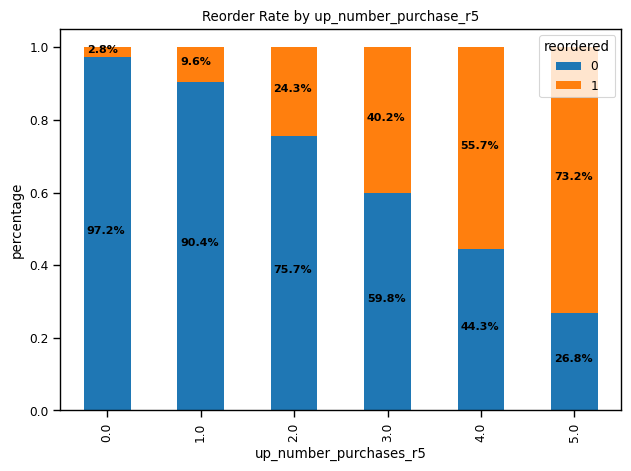

In [27]:
cross = pd.crosstab(train['up_num_purchases_within5'], train['reordered'], normalize='index')
print(cross)
cross.plot(kind='bar', stacked=True)
plt.xlabel('up_number_purchases_r5')
plt.ylabel('percentage')
plt.title('Reorder Rate by up_number_purchase_r5')
# add % on plot
for n, x in enumerate([*cross.index.values]):
    for (proportion, y_loc) in zip(cross.loc[x],
                                   cross.loc[x].cumsum()):
        plt.text(x=n - 0.22,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="black",
                 fontsize=8,
                 fontweight="bold")
plt.show();

In [ ]:
cross = pd.crosstab(train['up_organic_substitute_num_purchases_r5'].astype(int), train['reordered'], normalize='index')
cross.sort_index(ascending=False, inplace=True)
print(cross)

In [ ]:
cross[[1]].plot(kind='barh', legend=None, figsize=(8, 6))
# sns.barplot(x=1, y='up_organic_substitute_num_purchases_r5', data=cross[1].reset_index())
plt.ylabel('up_organic_substitute_num_purchases_r5')
plt.xlabel('order rate')
plt.title('Reorder Rate by Purchase of Organic Substitutes')
plt.savefig('data/Reorder Rate by Purchase of Organic Substitutes')
plt.show()

<Figure size 1000x2200 with 0 Axes>

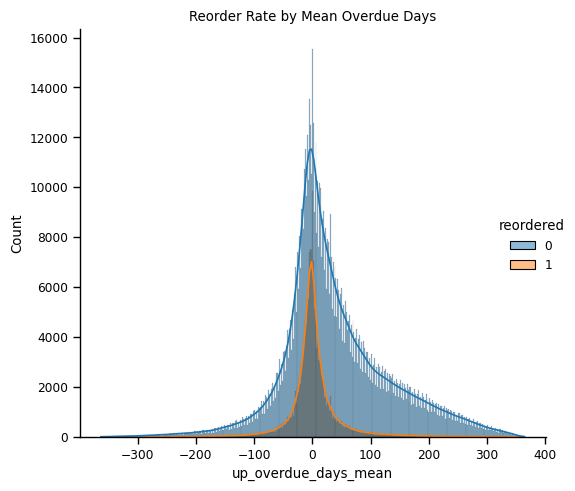

In [28]:
plt.figure(figsize=(10, 22))
sns.displot(x='up_overdue_days_mean', data=train, hue='reordered', kde=True)
plt.title('Reorder Rate by Mean Overdue Days')
plt.tight_layout()
plt.savefig('data/Reorder Rate by Mean Overdue Days')
plt.show(block=True);

In [12]:
train.loc[train['reordered']==0, 'up_overdue_days_mean'].describe().round(decimals = 2)

count    840902.00
mean         39.03
std          92.23
min        -363.00
25%         -13.17
50%          19.00
75%          84.00
max         364.00
Name: up_overdue_days_mean, dtype: float64

In [17]:
train.loc[train['reordered']==1, 'up_overdue_days_mean'].describe().round(decimals = 2)

count    177193.00
mean          2.04
std          44.80
min        -361.00
25%         -13.00
50%          -1.00
75%          13.00
max         362.00
Name: up_overdue_days_mean, dtype: float64